## Permutation feature importances plot

In [4]:
import pickle

# Load DataFrames
def load_data(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)

# Load training data
X_train_imbalanced_no_debris, y_train_imbalanced_no_debris,X_test_imbalanced_no_debris, y_test_imbalanced_no_debris = load_data('C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/features/Xydata_imbalanced_no_DEBRIS.pkl')
X_train_imbalanced_debris, y_train_imbalanced_debris,X_test_imbalanced_debris, y_test_imbalanced_debris= load_data('C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/features/Xydata_imbalanced_DEBRIS.pkl')
X_train_balanced_debris, y_train_balanced_debris,X_test_balanced_debris, y_test_balanced_debris= load_data('C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/features/Xydata_balanced_DEBRIS.pkl')
X_train_balanced_no_debris, y_train_balanced_no_debris,X_test_balanced_no_debris,y_test_balanced_no_debris = load_data('C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/features/Xydata_balanced_no_DEBRIS.pkl')



In [5]:
from sklearn.tree import DecisionTreeClassifier

trees = {}

train_sets = {
    '"Imbalanced / No Debris"': (X_train_imbalanced_no_debris, y_train_imbalanced_no_debris),
    '"Imbalanced / Debris"': (X_train_imbalanced_debris, y_train_imbalanced_debris),
    '"Balanced / Debris"': (X_train_balanced_debris, y_train_balanced_debris),
    '"Balanced / No Debris"': (X_train_balanced_no_debris, y_train_balanced_no_debris),
}

for label, (X_train, y_train) in train_sets.items():
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=1)
    tree.fit(X_train, y_train)
    trees[label] = tree

In [6]:
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, f1_score

f1_macro_scorer = make_scorer(f1_score, average='macro')

test_sets = {
    '"Imbalanced / No Debris"': (X_test_imbalanced_no_debris, y_test_imbalanced_no_debris),
    '"Imbalanced / Debris"': (X_test_imbalanced_debris, y_test_imbalanced_debris),
    '"Balanced / Debris"': (X_test_balanced_debris, y_test_balanced_debris),
    '"Balanced / No Debris"': (X_test_balanced_no_debris, y_test_balanced_no_debris),
}

importance_results = {}
for label, (X_test, y_test) in test_sets.items():
    tree = trees[label] 
    results = permutation_importance(tree, X_test, y_test, scoring=f1_macro_scorer)
    permutation_importances = pd.Series(results.importances_mean, index=X_test.columns)
    importance_results[label] = permutation_importances

importance_df = pd.DataFrame(importance_results)
file_path = 'C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/feature_importances.csv'
importance_df.to_csv(file_path, index=True)

In [7]:
importance_df

,"""Imbalanced / No Debris""","""Imbalanced / Debris""","""Balanced / Debris""","""Balanced / No Debris"""
Area (ABD),0.033945,0.043196,-0.000309,0.032203
Area (Filled),0.019815,0.057969,0.299305,0.021873
Aspect Ratio,0.196736,0.206775,0.166961,0.203761
Circle Fit,0.000487,0.005887,-0.000457,-0.000620
Circularity,0.000920,0.001202,0.001229,0.000000
Circularity (Hu),0.127108,0.185783,0.138683,0.184110
Compactness,0.000862,0.000741,0.000398,0.000329
Convex Perimeter,-0.000091,0.048905,0.004661,0.000000
Convexity,0.142746,0.084437,0.008623,0.133794
Diameter (ABD),0.317632,0.080757,0.000204,0.365778


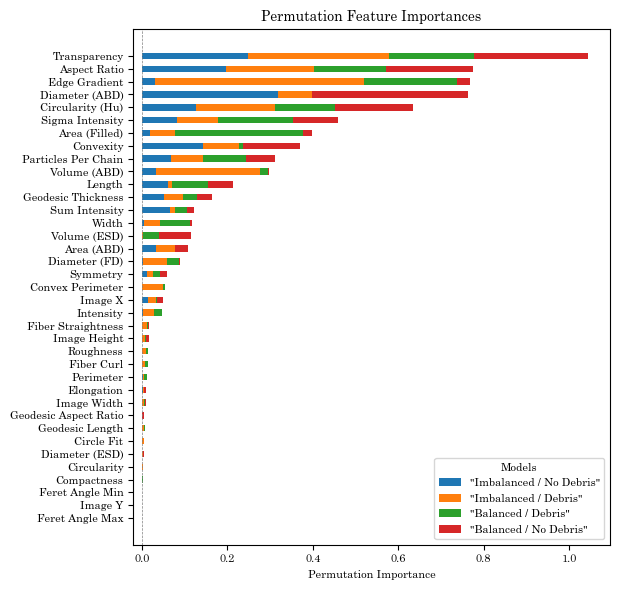

In [18]:
import matplotlib.pyplot as plt
import numpy as np

custom_font = "Century Schoolbook" 

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] 

fig, ax = plt.subplots(figsize=(6.3, 6)) 

bar_width = 0.5

importance_df['total'] = importance_df.sum(axis=1)
sorted_importances = importance_df.sort_values(by='total', ascending=True)
bar_positions = np.arange(len(sorted_importances.index)) 

bottoms = np.zeros(len(sorted_importances.index))

for i, (label, color) in enumerate(zip(test_sets.keys(), colors)):
    sorted_condition_importances = sorted_importances[label]
    
    ax.barh(bar_positions, sorted_condition_importances, 
            bar_width, left=bottoms, color=color, 
            label=label, edgecolor='none') 
    
    bottoms += sorted_condition_importances

ax.set_yticks(bar_positions)
ax.set_yticklabels(sorted_importances.index, fontsize=8, fontfamily=custom_font) 
ax.set_xlabel('Permutation Importance', fontsize=8, fontfamily=custom_font)
ax.set_title('Permutation Feature Importances', fontsize=10, fontfamily=custom_font)

ax.legend(title='Models', title_fontproperties={'family': custom_font, 'size': 8},
          loc='lower right', bbox_to_anchor=(1.0, 0.0), fontsize=8, 
          prop={'family': custom_font, 'size': 8})

ax.tick_params(axis='x', which='major', labelsize=8)
ax.tick_params(axis='y', which='major', labelsize=8)

for label in ax.get_xticklabels():
    label.set_fontfamily(custom_font)
    label.set_fontsize(8)

y_tick_positions = np.arange(len(sorted_importances.index))
ax.set_yticks(y_tick_positions)

xlim = ax.get_xlim()
ax.set_xlim(left=-0.02, right=xlim[1])
ax.axvline(x=0, color='grey', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig('all_permutation_feature_importances.png', dpi=300, bbox_inches='tight')
plt.show()
